In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import hdbscan  # pip install hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


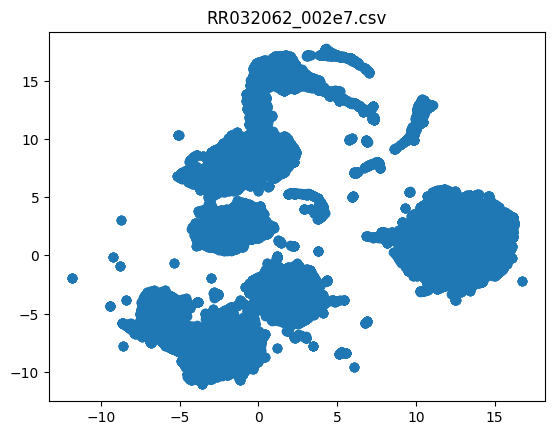

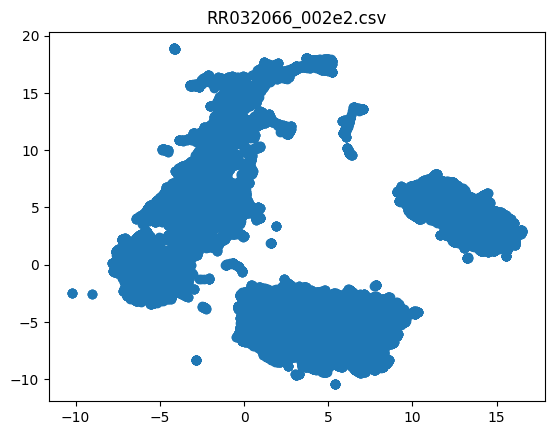

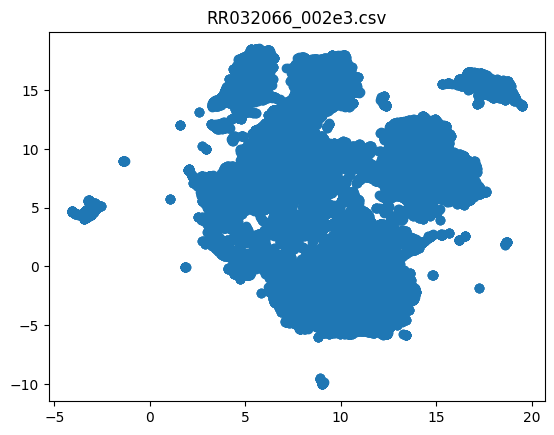

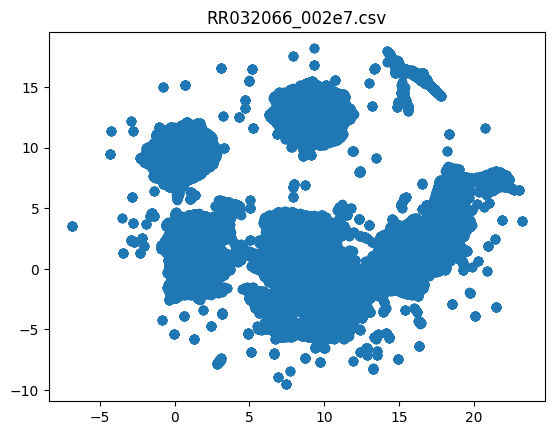

In [ ]:
data = []
files = ["Electrode D.csv",
         "Electrode A.csv", "Electrode B.csv", "Electrode C.csv"]
for f in files:
  d = np.genfromtxt(f, delimiter=',')
  data.append(d)
  plt.scatter(d[:,0], d[:,1])
  plt.title(f)
  plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


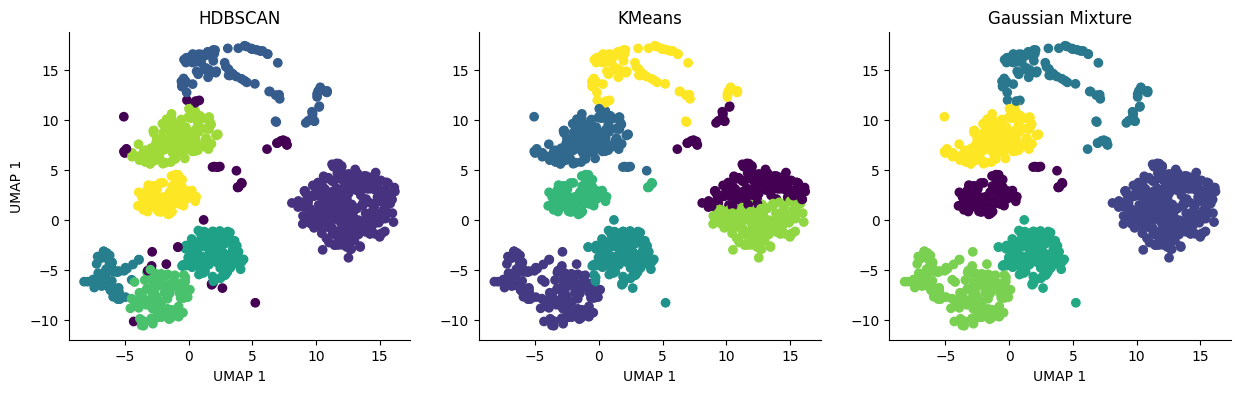

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


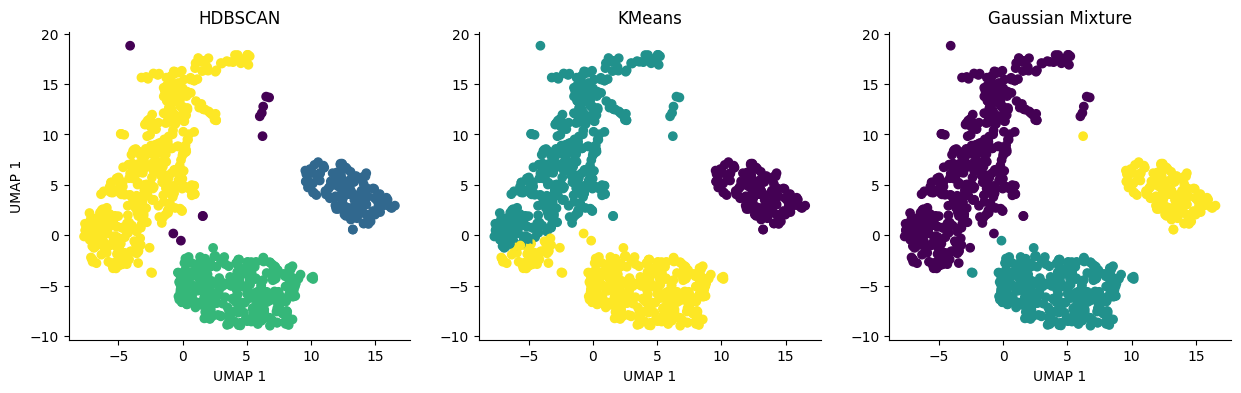

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


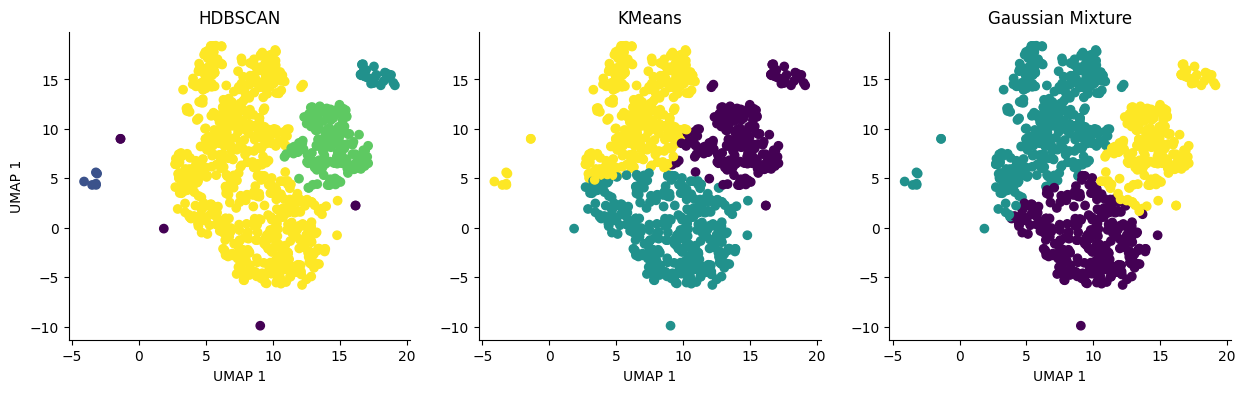

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


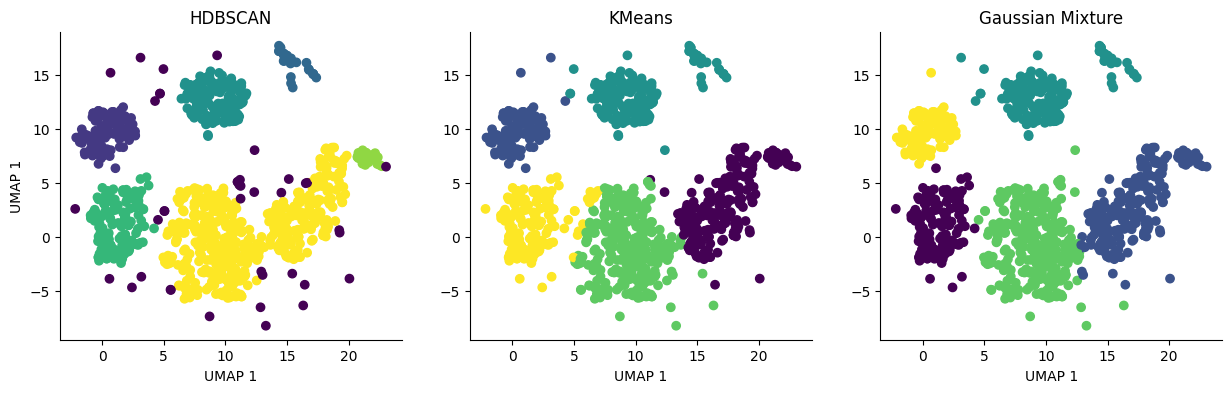

In [19]:
# Change significantly with the initial seed:
# "RR032062_002e7.csv" for kmeans and gmm
# "RR032066_002e3.csv" for gmm

hyper_parameters = [[7, 3, 3, 5], # k_means n_clusters
                    [6, 3, 3, 5], # gmm n_components
                    [500, 500, 200, 200]] # HDBScan min_cluster_size

down_sample = 1000

for i,d in enumerate(data):

  kmeans = KMeans(n_clusters=hyper_parameters[0][i])
  labels_kmeans = kmeans.fit_predict(d)

  gmm = GaussianMixture(n_components=hyper_parameters[1][i])
  labels_gmm = gmm.fit_predict(d)


  clusterer = hdbscan.HDBSCAN(min_cluster_size=hyper_parameters[2][i])
  labels_hdb = clusterer.fit_predict(d)

  ds = np.random.choice(np.arange(d.shape[0]), down_sample, replace=False)

  # plot
  fig, axs = plt.subplots(1, 3, figsize=(15, 4))

  axs[0].scatter(d[ds,0], d[ds,1], c=labels_hdb[ds])
  axs[0].set_title("HDBSCAN")
  axs[0].set_xlabel("UMAP 1")
  axs[0].set_ylabel("UMAP 1")
  axs[0].spines[['right', 'top']].set_visible(False)

  axs[1].scatter(d[ds,0], d[ds,1], c=labels_kmeans[ds])
  axs[1].set_title("KMeans")
  axs[1].set_xlabel("UMAP 1")
  axs[1].spines[['right', 'top']].set_visible(False)

  axs[2].scatter(d[ds,0], d[ds,1], c=labels_gmm[ds])
  axs[2].set_title("Gaussian Mixture")
  axs[2].set_xlabel("UMAP 1")
  axs[2].spines[['right', 'top']].set_visible(False)

  plt.show()